In [25]:
# -*- coding: utf-8 -*-
"""读取文件，统计数据,这次只统计呼吸相关科室的"""
import matplotlib.pyplot as plt 
import matplotlib as mpl
import json
from math import log
import re
def isJson(jsonstr):
    """判断是否是json"""
    try:
        a = json.loads(jsonstr)
        return True
    except:
        return False
def jibing_standardized(jibing_str):
    """疾病规范化，疾病后面括号里面的文字去除，疾病前边标识具体部位哪个部分（左，右，左上，右下等）的方位词去掉"""
    pattern_1 = "^(左上|左下|右上|右下|左|右|两|下|上)"
    str_1 = re.sub(pattern_1, "", jibing_str, count=0, flags=0)
    pattern_2 = "[A-Za-z0-9_]"
    str_2 = re.sub(pattern_2, "", str_1, count=0, flags=0)
    for i,item in enumerate(str_2):
        if item=="（" or item=="(" or item=="：":
            str_2 = str_2[0:i]
    str_2 = str_2.replace(" ","")
    return str_2
    pass

with open("all_result_break.json",'r',encoding="utf8") as load_f:
    keshi = {} #科室字典
    jibing = {} #疾病字典
    juzichangdu = {} #句子长度字典
    while True:
        #准备工作
        line = load_f.readline()
        if not line:
            break
        if not isJson(line):
            continue;
        json_to_dic = json.loads(line)
        #统计科室，只统计呼吸相关科室
        if "subject_name" not in json_to_dic:
            continue
        if "呼吸" not in json_to_dic["subject_name"]:
            continue
        if json_to_dic["subject_name"] in keshi:
            keshi[json_to_dic["subject_name"]] += 1
        else:
             keshi[json_to_dic["subject_name"]] = 1
        
        #统计疾病，只统计呼吸相关科室
        if "diag" not in json_to_dic:
            continue
        if "呼吸" not in json_to_dic["subject_name"]:
            continue
        standard_jibing = jibing_standardized(json_to_dic["diag"][0]["DIAG_DESC"])
        if standard_jibing in jibing:
            jibing[standard_jibing] += 1
        else:
            jibing[standard_jibing] = 1
        pass # do something
    
        #句子长度，只统计呼吸相关科室的现病史
        if "呼吸" not in json_to_dic["subject_name"]:
            continue
        if "xianbingshi" not in json_to_dic:
            continue
        if len(json_to_dic["xianbingshi"]) in juzichangdu:
            juzichangdu[len(json_to_dic["xianbingshi"])] += 1
        else:
            juzichangdu[len(json_to_dic["xianbingshi"])] = 1
    
#     print(sorted(keshi.items(),key = lambda x:x[1],reverse = True))
#     print("-"*50)
#     print(sorted(jibing.items(),key = lambda x:x[1],reverse = True))
#     print("-"*50)
#     print(sorted(juzichangdu.items(),key = lambda x:x[1],reverse = True))
    load_f.close()

[('肺炎', 2560), ('肺腺癌', 1512), ('为肿瘤化学治疗疗程', 1330), ('支气管或肺恶性肿瘤', 1054), ('肺鳞癌', 634), ('呼吸道感染', 584), ('恶性肿瘤维持性化学治疗', 573), ('肺部感染', 524), ('支气管炎', 444), ('肺小细胞肺癌', 318), ('疱疹性咽峡炎', 309), ('手足口病', 307), ('急性喘息性支气管炎', 258), ('慢性阻塞性肺病伴急性加重', 234), ('败血症', 215), ('脑供血不足', 212), ('慢性阻塞性肺病伴有急性加重', 205), ('手术后恶性肿瘤化学治疗', 180), ('支气管扩张伴感染', 178), ('肺占位', 171), ('肺癌', 167), ('肺腺癌术后', 158), ('慢性阻塞性肺疾病急性加重', 153), ('病毒性脑炎', 145), ('肺小细胞癌期', 141), ('肺小细胞癌', 139), ('医疗照顾，其他特指的', 131), ('急性支气管炎', 128), ('对症治疗', 120), ('小细胞肺癌', 119), ('冠心病', 115), ('类百日咳综合征', 114), ('急性毛细支气管炎', 111), ('肺占位性病变', 104), ('喘息性支气管炎', 98), ('支气管肺炎', 95), ('脑动脉供血不足', 92), ('恶性肿瘤靶向治疗', 87), ('脑梗塞后遗症', 87), ('肺鳞癌术后', 86), ('社区获得性肺炎', 84), ('传染性单核细胞增多症', 84), ('肺腺癌术后复发', 83), ('腹泻', 82), ('腹泻病', 77), ('肺诊断性影像检查的异常所见', 76), ('支气管肺癌', 66), ('胸腔积液', 65), ('冠状动脉粥样硬化性心脏病', 61), ('支气管感染', 59), ('川崎病', 59), ('肺的其他疾患', 59), ('社区获得性肺炎，非重症', 56), ('中枢神经系统感染', 56), ('高血压病', 54), ('肺腺癌期', 54), ('间质性肺病', 53), ('脑梗塞', 53), ('脑梗死后遗症', 53), (

In [26]:
"""打印总数与每一项"""
# 打印总数
keshi_count = 0
jibing_count = 0
juzichangdu_count = 0
for key in keshi:
    keshi_count += keshi[key]
for key in jibing:
    jibing_count += jibing[key]
for key in juzichangdu:
    juzichangdu_count += juzichangdu[key]
print("sample_num_of_keshi",":",keshi_count)
print("sample_num_of_jibing",":",jibing_count)
print("sample_num_of_juzichangdu",":",juzichangdu_count)

#逐项打印
for key,value in sorted(keshi.items(),key = lambda x:x[1],reverse = True):
    print(key,":",value )
#     print(key,":",(value/keshi_count)*100,"%" )
print("--"*50)
for key,value in sorted(jibing.items(),key = lambda x:x[1],reverse = True):
    print(key,":",value )
#     print(key,":",(value/jibing_count)*100,"%" )
print("--"*50)
for key,value in sorted(juzichangdu.items(),key = lambda x:x[1],reverse = True):
    print(key,":",value )
#     print(key,":",(value/juzichangdu_count)*100,"%" )

sample_num_of_keshi : 22498
sample_num_of_jibing : 22498
sample_num_of_juzichangdu : 22498
儿童呼吸科1组(本部主8F东南) : 5251
呼吸内科1组(本部南3F) : 4069
呼吸科6组(南区) : 2240
儿童呼吸科2组(本部主9F东南) : 2198
呼吸肿瘤内科1组(西区) : 2111
呼吸肿瘤内科2组(西区) : 1606
老年呼吸内科1组(本部保11F) : 1255
三东呼吸科(南区) : 749
呼吸科7组(南区) : 589
呼吸科三组(西区) : 582
呼吸内科3组(本部南3F) : 556
呼吸内科4组(本部南3F) : 530
呼吸内科2组(本部南3F) : 490
老年呼吸内科2组(本部保11F) : 272
----------------------------------------------------------------------------------------------------
肺炎 : 2560
肺腺癌 : 1512
为肿瘤化学治疗疗程 : 1330
支气管或肺恶性肿瘤 : 1054
肺鳞癌 : 634
呼吸道感染 : 584
恶性肿瘤维持性化学治疗 : 573
肺部感染 : 524
支气管炎 : 444
肺小细胞肺癌 : 318
疱疹性咽峡炎 : 309
手足口病 : 307
急性喘息性支气管炎 : 258
慢性阻塞性肺病伴急性加重 : 234
败血症 : 215
脑供血不足 : 212
慢性阻塞性肺病伴有急性加重 : 205
手术后恶性肿瘤化学治疗 : 180
支气管扩张伴感染 : 178
肺占位 : 171
肺癌 : 167
肺腺癌术后 : 158
慢性阻塞性肺疾病急性加重 : 153
病毒性脑炎 : 145
肺小细胞癌期 : 141
肺小细胞癌 : 139
医疗照顾，其他特指的 : 131
急性支气管炎 : 128
对症治疗 : 120
小细胞肺癌 : 119
冠心病 : 115
类百日咳综合征 : 114
急性毛细支气管炎 : 111
肺占位性病变 : 104
喘息性支气管炎 : 98
支气管肺炎 : 95
脑动脉供血不足 : 92
恶性肿瘤靶向治疗 : 87
脑梗塞后遗症 : 87
肺鳞癌术后 : 

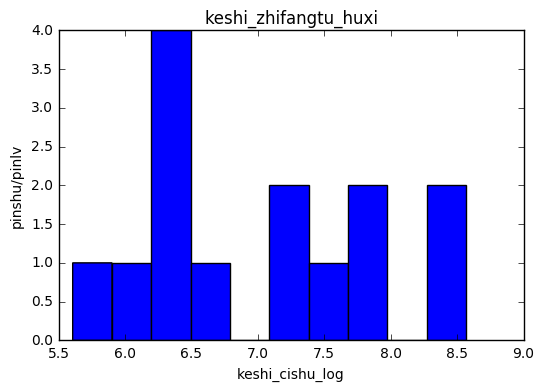

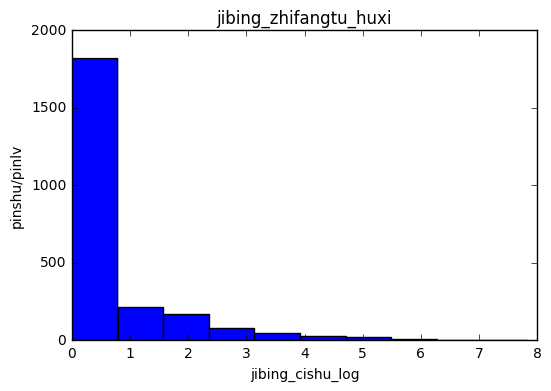

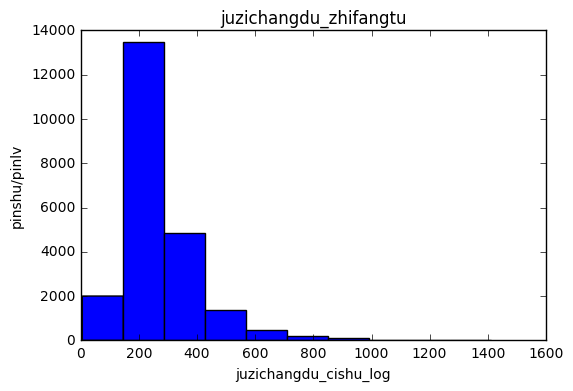

In [28]:
"""#画图  直方图"""
#keshi直方图
keshi_jishu_log = [log(value) for key,value in sorted(keshi.items(),key = lambda x:x[1],reverse = True) ]
plt.hist(keshi_jishu_log, 10, normed=False)   
plt.xlabel("keshi_cishu_log")
plt.ylabel("pinshu/pinlv")
plt.title("keshi_zhifangtu_huxi")
plt.show()

#jibing直方图
jibing_jishu_log = [log(value) for key,value in sorted(jibing.items(),key = lambda x:x[1],reverse = True)]
plt.hist(jibing_jishu_log,10,normed=False)
plt.xlabel("jibing_cishu_log")
plt.ylabel("pinshu/pinlv")
plt.title("jibing_zhifangtu_huxi")
plt.show()

#juzichangdu直方图
juzichangdu_jishu_log = []
for key,value in sorted(juzichangdu.items(),key = lambda x:x[1],reverse = True):
    for i in range(value):
        juzichangdu_jishu_log.append(key)
# print(juzichangdu_jishu_log)
plt.hist(juzichangdu_jishu_log,10,normed=False)
plt.xlabel("juzichangdu_cishu_log")
plt.ylabel("pinshu/pinlv")
plt.title("juzichangdu_zhifangtu")
plt.show()

In [29]:
"""计算平均句子长度，平均科室出现次数，平均疾病出现次数，呼吸相关科室"""
# 计算总数
keshi_count = 0 #科室出现总数
jibing_count = 0 #疾病出现总数
juzichangdu_count = 0 #句子长度出现总数，句子个数
for key in keshi:
    keshi_count += keshi[key]
for key in jibing:
    jibing_count += jibing[key]
for key in juzichangdu:
    juzichangdu_count += juzichangdu[key]
    
#计算每一项的平均值
#keshi 计算平均每个科室出现的次数 = 科室出现总数/科室个数
mean_keshi_chuxiancishu = keshi_count/len(keshi)
#jibing 计算平均每个疾病出现次数 = 疾病出现总次数/疾病种类
mean_jibing_chuxian_cishu = jibing_count/len(jibing)
#juzichangdu 计算平均句子长度 = (定长句子出现个数/句子个数)*(长度) 再对每个长度求和
mean_juzichangdu = 0
for key in juzichangdu:
    mean_juzichangdu += (key/juzichangdu_count)*(juzichangdu[key])
print("平均每个科室出现次数",":",mean_keshi_chuxiancishu)
print("平均每个疾病出现次数",":",mean_jibing_chuxian_cishu)
print("平均句子长度",":",mean_juzichangdu)


平均每个科室出现次数 : 1607.0
平均每个疾病出现次数 : 9.397660818713451
平均句子长度 : 268.17734909769734
